## Instalando Bibliotecas

In [ ]:
pip install seaborn

In [ ]:
pip install scikit-learn

### Realizando importação de bibliotecas

In [19]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix
)

### Cálculo de especifidades

In [20]:
def calcular_especificidade(y_true, y_pred):
    """Calcula a especificidade com base na matriz de confusão."""
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    especificidade = tn / (tn + fp) if (tn + fp) > 0 else 0
    return especificidade

### Plotando Matriz de Confusão

In [21]:
def plotar_matriz_confusao(y_true, y_pred, classes):
    """Plota a matriz de confusão normalizada."""
    cm = confusion_matrix(y_true, y_pred)
    cm_normalizado = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_df = pd.DataFrame(cm_normalizado, index=classes, columns=classes)


    plt.figure(figsize=(8, 8))
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Matriz de Confusão Normalizada')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

### Plotando curva ROC

In [22]:
def plotar_curva_roc(y_true, y_scores):
    """Plota a curva ROC e calcula a AUC."""
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)


    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Curva ROC')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

### Calculando e Exibindo métricas de classificação de forma separada

In [23]:
def avaliar_metrica_separada(nome, valor):
    print(f"{nome}: {valor:.2f}")

### Avaliando Classificação

In [24]:
def avaliar_classificacao(y_true, y_pred, y_scores, classes):
    print("Métricas de Classificação:")
    acuracia = accuracy_score(y_true, y_pred)
    precisao = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    especificidade = calcular_especificidade(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='binary')


    avaliar_metrica_separada("Acurácia", acuracia)
    avaliar_metrica_separada("Precisão", precisao)
    avaliar_metrica_separada("Sensibilidade (Recall)", recall)
    avaliar_metrica_separada("Especificidade", especificidade)
    avaliar_metrica_separada("F1-Score", f1)


    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))


    plotar_matriz_confusao(y_true, y_pred, classes)
    plotar_curva_roc(y_true, y_scores)

### Exemplo no Google Colab

In [25]:
if __name__ == "__main__":
    # Dados fictícios para exemplo de classificação
    y_true_clf = [0, 1, 1, 0, 1, 0, 1]
    y_pred_clf = [0, 1, 0, 0, 1, 1, 1]
    y_scores_clf = [0.1, 0.9, 0.4, 0.3, 0.8, 0.7, 0.9]  # Pontuações preditivas
    classes = [0, 1]

### Avaliando Modelo

Métricas de Classificação:
Acurácia: 0.71
Precisão: 0.75
Sensibilidade (Recall): 0.75
Especificidade: 0.67
F1-Score: 0.75

Matriz de Confusão:
[[2 1]
 [1 3]]


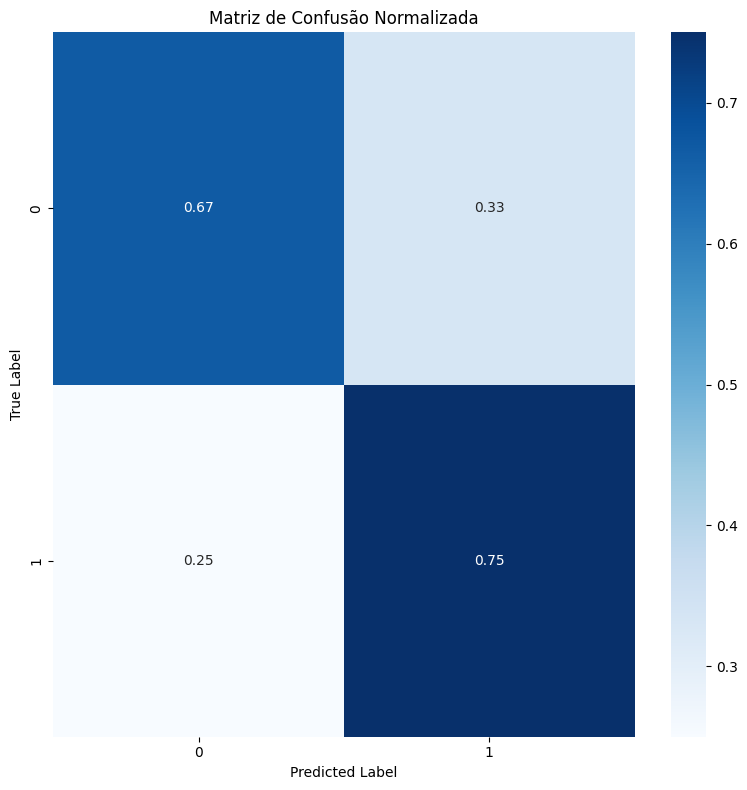

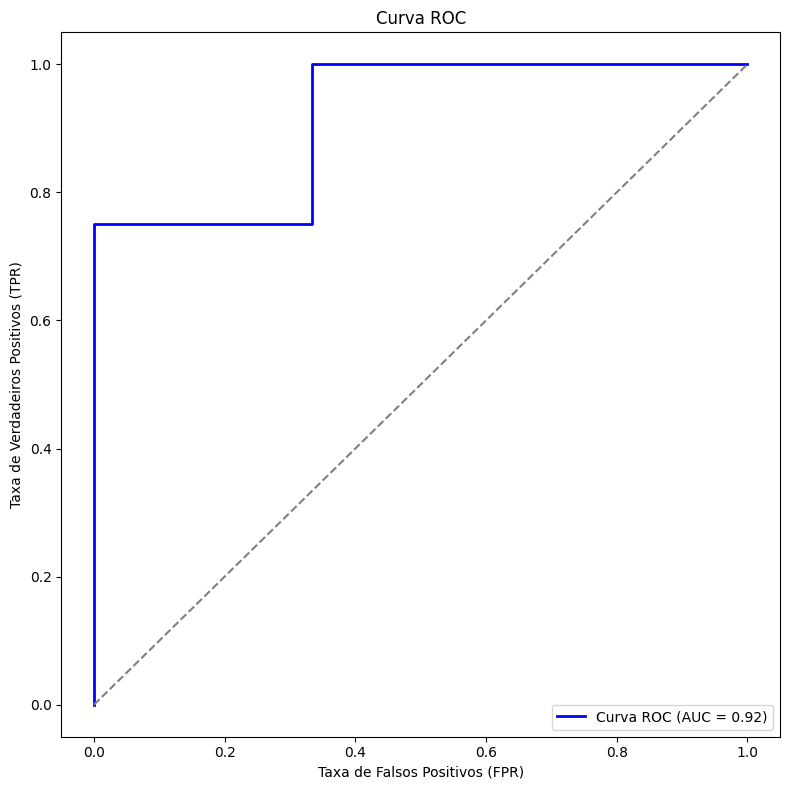

In [26]:
avaliar_classificacao(y_true_clf, y_pred_clf, y_scores_clf, classes)